<a href="https://colab.research.google.com/github/NelisLima/data_science/blob/main/2_machine_learning_prevendo_manutencao_de_maquinas_industriais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='blue'>Projeto de Data Science - Machine Learning</font>

### <font color='blue'> Prevendo Manutenção de Máquinas Industriais - Classificação</font>

### Instalando e Carregando os Pacotes

In [ ]:
# Import
import pickle
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Etapa 1 - Definindo e Compreendendo o Problema a Ser Resolvido

Objetivo: Prever se uma máquina industrial precisa ou não de manutenção através de 178 leituras de dados de sensores IoT (Internet of Things ou Internet das Coisas).

### Etapa 2 - Compreensão dos Dados

Vamos trabalhar com dados históricos coletados de sensores IoT de máquinas industriais. Os dados são fictícios.

Cada linha do dataset contém 178 leituras, que são as colunas de diferentes sensores. Ou seja, existem 178 colunas que compõem as leituras de sensores IoT. No total, existem 11.500 linhas e 179 colunas com a última coluna contendo o status da máquina industrial, se precisou ou não de manutenção.

Os dados são fictícios.

### Etapa 3 - Carregando os Dados

In [ ]:
# Carregando os dados
df = pd.read_csv("dataset.csv")

In [ ]:
# Shape
df.shape
df.shape

(11500, 179)

In [ ]:
# Visualizando alguns registros
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,VARIAVEL_ALVO
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


### Etapa 4 - Análise Exploratória e Definição da Variável Alvo

Na última coluna, o valor 1 representa a classe positiva (a máquina precisou de manutenção), enquanto o valor zero representa a classe negativa (a máquina não precisou de manutenção). Esta será nossa variável alvo.

In [ ]:
# Resumo estatístico
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,VARIAVEL_ALVO
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [ ]:
print("Número de colunas:", len(df.columns))

Número de colunas: 179


In [ ]:
# Verificando valores ausentes
df.isna().sum().sum()

np.int64(0)

### Calculando a Prevalência da Classe Positiva

A prevalência é a porcentagem de amostras que tem a característica que você está tentando prever. Nesse cenário específico, significa que as máquinas que precisaram de manutenção representam a classe positiva (ocorrência do evento), enquanto as que não nao precisaram de manutenção representam a classe negativa (não ocorrência do evento).

A taxa é calculada por (número de amostras positivas / número de amostras). Portanto, uma taxa de prevalência de 0,2 significa que 20% de nossa amostra são de máquinas que precisaram de manutenção.

In [ ]:
# Esta função calcula a prevalência da classe positiva (label = 1)
def calcula_prevalencia(y_actual):
    return sum(y_actual) / len(y_actual)

In [ ]:
print("Prevalência da classe positiva: %.3f"% calcula_prevalencia(df["VARIAVEL_ALVO"].values))

Prevalência da classe positiva: 0.200


### Etapa 5 - Limpeza dos Dados

In [ ]:
# Preparando o dataset somente com os dados de interesse
collist = df.columns.tolist()
cols_input = collist[0:178]
df_data = df[cols_input + ["VARIAVEL_ALVO"]]

In [ ]:
df_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,VARIAVEL_ALVO
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
# Checando se temos colunas duplicadas nos dados de entrada
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "há colunas duplicadas"

set()


In [ ]:
# Checando se temos colunas duplicadas no dataset final
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "há colunas duplicadas"

set()


### Etapa 6 - Divisão dos Dados em Treino, Validação e Teste

A divisão de treinamento é usada para treinar nosso algoritmo de aprendizado de máquina, por isso queremos usar a maioria de nosso conjunto de dados. O conjunto de dados de validação é usado para ajustar os hiperparâmetros e selecionar a abordagem de melhor desempenho. O conjunto de dados de teste é usado para testar a precisão do nosso modelo de aprendizado de máquina.

Geralmente, podemos dividir o conjunto de dados em 50/25/25, 60/20/20, 70/15/15 como a divisão para amostras de treinamento / validação / teste; isso também depende de quantas amostras temos. Se tivermos um conjunto de dados extremamente grande (centenas de milhões de linhas), podemos usar uma divisão como 98/1/1.

In [ ]:
df_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,VARIAVEL_ALVO
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
# Gerando amostras aleatórias dos dados
df_data = df_data.sample(n = len(df_data))

In [ ]:
# Ajustando os índices do dataset
df_data = df_data.reset_index(drop = True)

In [ ]:
# Gera um índice para a divisão
df_valid_teste = df_data.sample(frac = 0.3)
print("Tamanho da divisão de validação / teste: %.1f" % (len(df_valid_teste) / len(df_data)))

Tamanho da divisão de validação / teste: 0.3


In [ ]:
# Fazendo a divisão 70/15/15

# Dados de teste
df_teste = df_valid_teste.sample(frac = 0.5)

# Dados se validação
df_valid = df_valid_teste.drop(df_teste.index)

# Dados de treino
df_treino = df_data.drop(df_valid_teste.index)

In [90]:
# Verifique a prevalência de cada subconjunto
print("Teste(n = %d): %.3f" % (len(df_teste), calcula_prevalencia(df_teste.VARIAVEL_ALVO.values)))
print("Validação(n = %d): %.3f" % (len(df_valid), calcula_prevalencia(df_valid.VARIAVEL_ALVO.values)))
print("Treino(n = %d): %.3f" % (len(df_treino), calcula_prevalencia(df_treino.VARIAVEL_ALVO.values)))

Teste(n = 1725): 0.201
Validação(n = 1725): 0.197
Treino(n = 8050): 0.200


In [91]:
print('Todas as amostras (n = %d)'%len(df_data))
assert len(df_data) == (len(df_teste) + len(df_valid) + len(df_treino)), 'algo saiu errado'

Todas as amostras (n = 11500)


Queremos equilibrar nosso conjunto de dados para evitar a criação de um modelo que classifique incorretamente as amostras como pertencentes à classe majoritária. Por exemplo, se tivermos um conjunto de dados de detecção de fraude e a maioria dos casos for "Não é fraude", o modelo de classificação tenderia a favorecer a classe "Não é fraude", o que leva a resultados enganosos.

Equilibramos nosso conjunto de dados para que as proporções de cada classe sejam as mesmas para evitar a criação de um modelo "desequilibrado".

Como temos 2300 amostras positivas, podemos usar o método de balanceamento de subamostras para usar apenas um subconjunto aleatório das amostras negativas.

### Etapa 7 - Balanceamento de Classe

Aplicamos balanceamento de classe somente nos dados de treino.

In [ ]:
# Cria um índice
rows_pos = df_treino.VARIAVEL_ALVO == 1

In [ ]:
# Define valores positivos e negativos do índice
df_train_pos = df_treino.loc[rows_pos]
df_train_neg = df_treino.loc[~rows_pos]

In [ ]:
# Valor mínimo
n = np.min([len(df_train_pos), len(df_train_neg)])

In [ ]:
# Obtém valores aleatórios para o dataset de treino
df_treino_final = pd.concat([df_train_pos.sample(n = n, random_state = 64),
                             df_train_neg.sample(n = n, random_state = 64)],
                            axis = 0,
                            ignore_index = True)

In [ ]:
# Amostragem
df_treino_final = df_treino_final.sample(n = len(df_treino_final), random_state = 64).reset_index(drop = True)

In [92]:
print('Balanceamento em Treino(n = %d): %.3f'%(len(df_treino_final),
                                               calcula_prevalencia(df_treino_final.VARIAVEL_ALVO.values)))

Balanceamento em Treino(n = 3228): 0.500


Principais Técnicas de Balanceamento de Classe

**Undersampling**: Esta técnica envolve reduzir o número de exemplos da classe majoritária para igualar ao número de exemplos da classe minoritária. Ou seja, você diminui o tamanho do conjunto de dados ao remover aleatoriamente registros da classe que tem mais exemplos. Isso pode ajudar a equilibrar o conjunto de dados, mas também pode resultar na perda de informações importantes, pois muitos dados da classe majoritária são descartados.

**Oversampling**: Por outro lado, o oversampling envolve aumentar o número de exemplos na classe minoritária para que se iguale ao número de exemplos na classe majoritária. Isso geralmente é feito replicando os registros da classe minoritária ou gerando dados sintéticos semelhantes. Essa abordagem mantém todas as informações da classe majoritária e aumenta o conjunto de dados, mas pode levar a um problema de overfitting, onde o modelo aprende demais os detalhes específicos da classe minoritária replicada ou pode gerar um dataset tendencioso.

In [ ]:
# Salvamos todos os datasets em disco no formato csv.
df_treino.to_csv('dados_treino.csv', index = False)
df_treino_final.to_csv('dados_treino_final.csv', index = False)
df_valid.to_csv('dados_valid.csv', index = False)
df_teste.to_csv('dados_teste.csv', index = False)

In [ ]:
# Salvamos os dados de entrada (colunas preditoras) para facilitar a utilização mais tarde
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

> Criamos as Matrizes X e Y.

In [ ]:
# X
X_treino = df_treino_final[cols_input].values
X_valid = df_valid[cols_input].values

In [ ]:
# Y
y_treino = df_treino_final['VARIAVEL_ALVO'].values
y_valid = df_valid['VARIAVEL_ALVO'].values

In [ ]:
# Print
print('Shape dos dados de treino:', X_treino.shape, y_treino.shape)
print('Shape dos dados de validação:', X_valid.shape, y_valid.shape)

Shape dos dados de treino: (3228, 178) (3228,)
Shape dos dados de validação: (1725, 178) (1725,)


In [ ]:
X_treino

array([[ -41,  -35,  -28, ...,    7,    8,   10],
       [  62,   82,   75, ...,   42,   35,   10],
       [   6,    7,    4, ...,  -33,  -42,  -37],
       ...,
       [-112, -100, -107, ..., -149, -127, -127],
       [ -81,  103,   28, ..., -674, -572, -490],
       [ -42,  -69, -100, ...,   39,   60,   72]])

### Etapa 8 - Padronização

A padronização no pré-processamento de dados é uma técnica fundamental quando estamos criando modelos de classificação, assim como para muitos outros tipos de modelos de machine learning. Isso se deve a várias razões importantes:

**Escala dos Dados**: Diferentes variáveis podem operar em escalas muito distintas. Por exemplo, imagine um dataset que inclui a idade dos indivíduos (variando de 0 a 100) e seus salários (podendo variar de milhares a dezenas de milhares). Um modelo de machine learning pode atribuir mais importância às variáveis com maiores magnitudes simplesmente devido à sua escala, o que pode levar a uma performance subótima do modelo.

**Convergência mais Rápida**: Muitos algoritmos de machine learning, especialmente aqueles que utilizam gradiente descendente como método de otimização (por exemplo, regressão logística, redes neurais), convergem mais rapidamente quando os dados estão padronizados. Isso ocorre porque a padronização ajuda a garantir que o gradiente descendente não fique preso em escalas desproporcionais ao ajustar os pesos.

**Interpretabilidade**: Quando padronizamos as variáveis, podemos interpretar mais diretamente a importância de cada variável no modelo. Em modelos lineares, por exemplo, os coeficientes podem ser interpretados como a importância de cada variável, assumindo que todas elas estão na mesma escala.

In [ ]:
# Cria o objeto
scaler = StandardScaler()

In [ ]:
# Faz o fit
scaler.fit(X_treino)

StandardScaler()

In [ ]:
# Salva o objeto em disco e carrega para usamos adiante
scalerfile = 'scaler.sav'

In [ ]:
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

In [ ]:
# Aplica a padronização em nossas matrizes de dados
X_treino_tf = scaler.transform(X_treino)
X_valid_tf = scaler.transform(X_valid)

In [ ]:
X_treino_tf

array([[-0.10762048, -0.08902763, -0.06500409, ...,  0.11388263,
         0.1164984 ,  0.12426106],
       [ 0.31168285,  0.38337981,  0.35474383, ...,  0.26153029,
         0.22936688,  0.12426106],
       [ 0.08371211,  0.08055453,  0.06540303, ..., -0.05485755,
        -0.09251729, -0.07019171],
       ...,
       [-0.39665482, -0.35147621, -0.38694667, ..., -0.54420406,
        -0.44784396, -0.44254808],
       [-0.27045673,  0.46817089,  0.16320837, ..., -2.75891888,
        -2.30808359, -1.94438544],
       [-0.11169139, -0.22630843, -0.35842011, ...,  0.24887477,
         0.33387472,  0.38077322]])

### Etapa 9 - Modelagem Preditiva

Vamos criar funções auxiliares para o cálculo das métricas.

In [93]:
# Função para calcular a especificidade
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual ==0)

In [94]:
# Função para gerar relatório de métricas
def print_report(y_actual, y_pred, thresh):

    auc = roc_auc_score(y_actual, y_pred)

    accuracy = accuracy_score(y_actual, (y_pred > thresh))

    recall = recall_score(y_actual, (y_pred > thresh))

    precision = precision_score(y_actual, (y_pred > thresh))

    specificity = calc_specificity(y_actual, y_pred, thresh)

    print('AUC:%.3f'%auc)
    print('Acurácia:%.3f'%accuracy)
    print('Recall:%.3f'%recall)
    print('Precisão:%.3f'%precision)
    print('Especificidade:%.3f'%specificity)
    print(' ')

    return auc, accuracy, recall, precision, specificity

As métricas acima são comumente utilizadas para avaliar o desempenho de modelos de classificação em machine learning. Cada uma delas fornece informações diferentes sobre a qualidade das previsões do modelo. Vamos descrevê-las:

**AUC (Área sob a Curva ROC)**: A métrica AUC refere-se à área sob a curva ROC (Receiver Operating Characteristic). A curva ROC é um gráfico que mostra o desempenho de um modelo de classificação em todos os limiares de classificação. Esta curva plota a taxa de verdadeiros positivos (sensibilidade) contra a taxa de falsos positivos (1 - especificidade) para diferentes limiares. AUC varia de 0 a 1, onde um modelo com AUC de 1 é um classificador perfeito, e um modelo com AUC de 0.5 não tem capacidade de classificação melhor do que o acaso.

**Accuracy (Acurácia)**: A acurácia é a fração de previsões corretas (tanto verdadeiros positivos quanto verdadeiros negativos) entre o total de casos examinados. É calculada como (verdadeiros positivos + verdadeiros negativos) / (total de casos). Enquanto a acurácia pode fornecer uma medida rápida da eficácia geral do modelo, ela pode ser enganosa em datasets desbalanceados, onde uma classe é muito mais frequente do que a outra.

**Recall (Sensibilidade ou Taxa de Verdadeiros Positivos)**: O recall é a proporção de positivos reais que foram corretamente identificados pelo modelo, calculado como (verdadeiros positivos) / (verdadeiros positivos + falsos negativos). É uma medida importante quando o custo de não detectar um verdadeiro positivo é alto.

**Precision (Precisão)**: A precisão é a proporção de previsões positivas que são realmente positivas, calculada como (verdadeiros positivos) / (verdadeiros positivos + falsos positivos). Alta precisão indica uma baixa taxa de falsos positivos. É particularmente importante em situações onde os falsos positivos têm um alto custo.

**Specificity (Especificidade)**: A especificidade é a proporção de negativos reais que foram corretamente identificados como tal, calculado como (verdadeiros negativos) / (verdadeiros negativos + falsos positivos). Não é diretamente calculada pelo scikit-learn, mas pode ser derivada da matriz de confusão ou calculada por uma função personalizada, como a calc_specificity mencionada. A especificidade é crucial em contextos onde é importante minimizar os falsos positivos.

Como equilibramos nossos dados de treinamento, vamos definir nosso limite em 0,5 para rotular uma amostra prevista como positiva.

In [ ]:
thresh = 0.5

### Versão 1  - Modelos Lineares

Para a versão 1 usaremos um modelo linear para classificação, a regressão logística.

O algoritmo de regressão logística é uma técnica de aprendizado de máquina usada para prever um resultado binário. Isso significa que ele é utilizado para decidir entre duas possíveis opções, como sim ou não, verdadeiro ou falso, sucesso ou fracasso.

O algoritmo funciona calculando a chance de um evento ocorrer com base nas características observadas nos dados. Por exemplo, pode-se usar a regressão logística para prever se um cliente fará ou não a compra de um produto, com base em seu histórico de compras e outras características pessoais. É um modelo fácil de compreender e muito poderoso.

In [ ]:
# Construção do modelo

# Cria o classificador (objeto)
lr = LogisticRegression(max_iter = 500, random_state = 142)

# Treina e cria o modelo
modelo_v1 = lr.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_v1.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v1.predict_proba(X_valid_tf)[:,1]

print('\nRegressão Logística\n')

print('Treinamento:\n')
v1_train_auc, v1_train_acc, v1_train_rec, v1_train_prec, v1_train_spec = print_report(y_treino,
                                                                                          y_train_preds,
                                                                                          thresh)

print('Validação:\n')
v1_valid_auc, v1_valid_acc, v1_valid_rec, v1_valid_prec, v1_valid_spec = print_report(y_valid,
                                                                                          y_valid_preds,
                                                                                          thresh)


Regressão Logística

Treinamento:

AUC:0.622
Acurácia:0.665
Recall:0.528
Precisão:0.728
Especificidade:0.802
 
Validação:

AUC:0.545
Acurácia:0.733
Recall:0.456
Precisão:0.360
Especificidade:0.801
 


### Versão 2  - Modelos Probabilísticos


Para a versão 2 usaremos um algoritmo probabilístico, o Gaussian Naive Bayes.

O algoritmo Gaussian Naive Bayes é um método de classificação baseado no teorema de Bayes, com a suposição de que os preditores (características de entrada) possuem uma distribuição normal (gaussiana). É chamado de "naive" (ingênuo) porque assume que todas as características são independentes umas das outras, o que raramente ocorre na prática, mas simplifica muito os cálculos. Esse algoritmo é eficaz em problemas de classificação onde as características são contínuas e presumivelmente têm uma distribuição normal, como em algumas tarefas de classificação de texto e problemas de diagnóstico médico. Ele calcula a probabilidade de cada categoria de saída com base nas características de entrada, e classifica cada instância na categoria com a maior probabilidade.

In [ ]:
# Construção do modelo

# Cria o classificador (objeto)
nb = GaussianNB()

# Treina e cria o modelo
modelo_v2 = nb.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_v2.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v2.predict_proba(X_valid_tf)[:,1]

print('\nNaive Bayes\n')

print('Treinamento:\n')
v2_train_auc, v2_train_acc, v2_train_rec, v2_train_prec, v2_train_spec = print_report(y_treino,
                                                                                          y_train_preds,
                                                                                          thresh)

print('Validação:\n')
v2_valid_auc, v2_valid_acc, v2_valid_rec, v2_valid_prec, v2_valid_spec = print_report(y_valid,
                                                                                          y_valid_preds,
                                                                                          thresh)


Naive Bayes

Treinamento:

AUC:0.982
Acurácia:0.931
Recall:0.892
Precisão:0.968
Especificidade:0.971
 
Validação:

AUC:0.984
Acurácia:0.958
Recall:0.897
Precisão:0.889
Especificidade:0.973
 


### Versão 3  - Modelos de Árvore de Decisão e Boosting


Para a versão 3 usaremos um algoritmo baseado em árvore de decisão e método boosting.

O algoritmo XGBoost (eXtreme Gradient Boosting) é uma implementação avançada de árvores de decisão com técnicas de boosting, que são métodos de aprendizado de máquina para aprimorar a precisão das previsões. O XGBoost constrói modelos de forma sequencial, onde cada novo modelo tenta corrigir os erros do anterior, focando nas instâncias que foram mais difíceis de prever corretamente.

A principal vantagem do XGBoost é sua capacidade de gerenciar de forma eficiente grandes volumes de dados e lidar com uma variedade de tipos de dados, sendo muito eficiente em termos de tempo de execução e uso de memória. Ele também possui recursos que permitem lidar com valores faltantes e suporta várias funções de perda, o que o torna adequado para uma ampla gama de problemas de classificação e regressão.

Além disso, o XGBoost oferece várias funcionalidades para melhorar o desempenho e a precisão do modelo, como regularização para evitar sobreajuste, e técnicas de poda de árvores. É amplamente utilizado em competições de ciência de dados e em aplicações industriais devido à sua robustez e eficácia.

In [ ]:
# Construção do modelo

# Cria o classificador
xgbc = XGBClassifier()

# Treina e cria o modelo
modelo_v3 = xgbc.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_v3.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_v3.predict_proba(X_valid_tf)[:,1]

print('\nXtreme Gradient Boosting Classifier\n')

print('Treinamento:\n')
v3_train_auc, v3_train_acc, v3_train_rec, v3_train_prec, v3_train_spec = print_report(y_treino,
                                                                                          y_train_preds,
                                                                                          thresh)

print('Validação:\n')
v3_valid_auc, v3_valid_acc, v3_valid_rec, v3_valid_prec, v3_valid_spec = print_report(y_valid,
                                                                                          y_valid_preds,
                                                                                          thresh)


Xtreme Gradient Boosting Classifier

Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 
Validação:

AUC:0.993
Acurácia:0.957
Recall:0.956
Precisão:0.846
Especificidade:0.957
 


## Etapa 10 - Validação Cruzada

A validação cruzada é uma técnica de avaliação de modelos que visa assegurar a capacidade de generalização de um modelo preditivo para um conjunto de dados independente. Esse método é utilizado para estimar a habilidade do modelo de se desempenhar em dados não vistos durante o treinamento, minimizando problemas como o overfitting. Na validação cruzada, o conjunto de dados é dividido em partes menores: um conjunto é utilizado para treinar o modelo (dados de treinamento) e o outro é usado para testar o modelo (dados de teste ou validação). O processo é repetido várias vezes (folds) com diferentes partições de treinamento e teste, e os resultados são então agregados para fornecer uma medida mais robusta do desempenho do modelo.

Um dos métodos mais comuns de validação cruzada é a validação cruzada k-fold, onde o conjunto de dados é dividido aleatoriamente em k partes (ou "folds") de aproximadamente o mesmo tamanho. O modelo é treinado k vezes, cada vez usando k-1 folds para treinamento e o fold restante para teste, garantindo que cada fold seja usado exatamente uma vez como dados de teste. Isso permite que todos os dados sejam utilizados tanto para treinamento quanto para teste, maximizando a eficiência do uso dos dados disponíveis. A validação cruzada fornece uma estimativa mais precisa do desempenho do modelo em comparação com a divisão simples dos dados em conjuntos de treinamento e teste, especialmente em casos de conjuntos de dados limitados ou desbalanceados.

Para realizar a validação cruzada no modelo de Xtreme Gradient Boosting Classifier (XGBClassifier), você pode usar a função cross_val_score da biblioteca scikit-learn. Esta função permite avaliar a eficácia do modelo usando diferentes divisões de treino/teste, o que ajuda a obter uma estimativa mais robusta do desempenho do modelo.

In [ ]:
# Cria o classificador
xgbc = XGBClassifier()

# Configura a validação cruzada
# Por exemplo, usando 5 divisões e a métrica de área sob a curva ROC (AUC)
n_splits = 5
score = 'roc_auc'

# Realiza a validação cruzada
cv_scores = cross_val_score(xgbc, X_treino_tf, y_treino, cv = n_splits, scoring = score)

# Exibe os resultados
print(f"Validação Cruzada com {n_splits} divisões")
print(f"Score AUC em Cada Divisão: {cv_scores}")
print(f"Média de Score AUC: {np.mean(cv_scores)}")

Validação Cruzada com 5 divisões
Score AUC em Cada Divisão: [0.9930029  0.99381763 0.99347257 0.98757764 0.98915447]
Média de Score AUC: 0.9914050445648854


### Etapa 11 - Otimização de Hiperparâmetros com GridSearchCV

Para realizar a otimização de hiperparâmetros no seu modelo XGBoost, você pode usar o GridSearchCV ou RandomizedSearchCV da biblioteca scikit-learn. Essas ferramentas permitem testar automaticamente várias combinações de hiperparâmetros e selecionar a melhor combinação com base no desempenho do modelo.

Vamos exemplificar como usar o GridSearchCV para otimizar alguns hiperparâmetros do XGBoost. O processo com RandomizedSearchCV seria similar, mas com a diferença de que ele testa um número fixo de combinações de hiperparâmetros escolhidas aleatoriamente, o que pode ser mais eficiente se o espaço de hiperparâmetros for muito grande.

In [ ]:
%%time

# Define o classificador
xgbc = XGBClassifier()

# Define o espaço de hiperparâmetros para a otimização
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

# Configura o GridSearchCV
grid_search = GridSearchCV(xgbc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1)

# Realiza a busca pelos melhores hiperparâmetros
grid_search.fit(X_treino_tf, y_treino)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Treina o modelo com os melhores hiperparâmetros
modelo_v4 = grid_search.best_estimator_

# Previsões com o modelo otimizado
y_train_preds_optimized = modelo_v4.predict_proba(X_treino_tf)[:,1]
y_valid_preds_optimized = modelo_v4.predict_proba(X_valid_tf)[:,1]

# Avaliação do modelo otimizado
print('\nXtreme Gradient Boosting Classifier - Otimizado\n')
print('Melhores hiperparâmetros:', best_params)

print('\nTreinamento:\n')
v4_train_auc, v4_train_acc, v4_train_rec, v4_train_prec, v4_train_spec = print_report(y_treino,
                                                                                          y_train_preds_optimized,
                                                                                          thresh)

print('Validação:\n')
v4_valid_auc, v4_valid_acc, v4_valid_rec, v4_valid_prec, v4_valid_spec = print_report(y_valid,
                                                                                          y_valid_preds_optimized,
                                                                                          thresh)


Xtreme Gradient Boosting Classifier - Otimizado

Melhores hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}

Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 
Validação:

AUC:0.994
Acurácia:0.961
Recall:0.965
Precisão:0.856
Especificidade:0.960
 
CPU times: user 12.3 s, sys: 1 s, total: 13.3 s
Wall time: 19min 33s


### Etapa 12 - Seleção do Melhor Modelo de Machine Learning

Vamos criar um dataframe com todos os resultados e plotar usando o seaborn.

In [ ]:
# Cria um dataframe com as métricas calculadas
df_results = pd.DataFrame({'classificador':['RL','RL','NB','NB','XGB','XGB','XGB_O','XGB_O'],
                           'data_set':['treino','validação'] * 4,
                           'auc':[v1_train_auc,
                                  v1_valid_auc,
                                  v2_train_auc,
                                  v2_valid_auc,
                                  v3_train_auc,
                                  v3_valid_auc,
                                  v4_train_auc,
                                  v4_valid_auc],
                           'accuracy':[v1_train_acc,
                                       v1_valid_acc,
                                       v2_train_acc,
                                       v2_valid_acc,
                                       v3_train_acc,
                                       v3_valid_acc,
                                       v4_train_acc,
                                       v4_valid_acc],
                           'recall':[v1_train_rec,
                                     v1_valid_rec,
                                     v2_train_rec,
                                     v2_valid_rec,
                                     v3_train_rec,
                                     v3_valid_rec,
                                     v4_train_rec,
                                     v4_valid_rec],
                           'precision':[v1_train_prec,
                                        v1_valid_prec,
                                        v2_train_prec,
                                        v2_valid_prec,
                                        v3_train_prec,
                                        v3_valid_prec,
                                        v4_train_prec,
                                        v4_valid_prec],
                           'specificity':[v1_train_spec,
                                          v1_valid_spec,
                                          v2_train_spec,
                                          v2_valid_spec,
                                          v3_train_spec,
                                          v3_valid_spec,
                                          v4_train_spec,
                                          v4_valid_spec]})

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->A métrica de desempenho escolhida será a pontuação AUC (AUC Score) do conjunto de validação. É a pontuação ideal para comparar modelos de algoritmos diferentes.

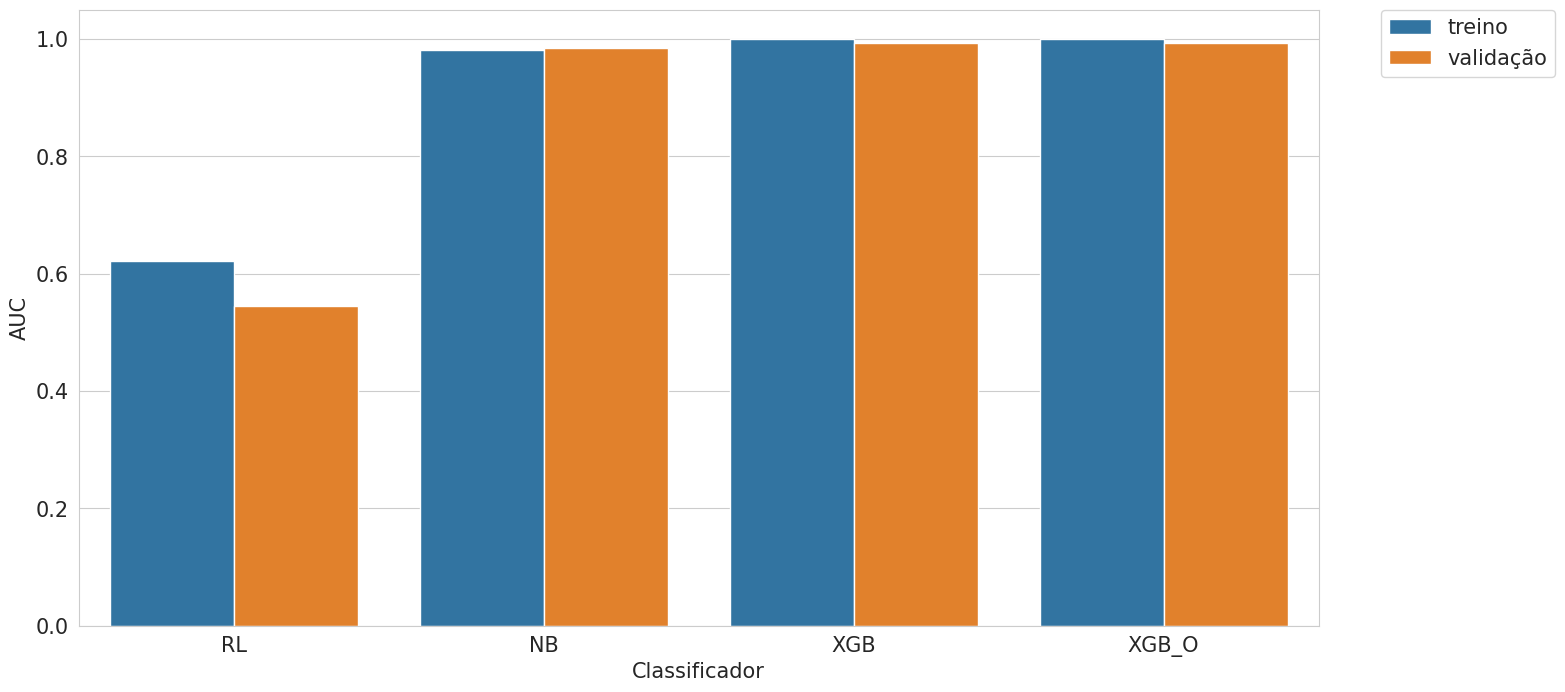

In [ ]:
# Construção do Plot
sns.set_style("whitegrid")
plt.figure(figsize = (16, 8))

# Gráfico de barras
ax = sns.barplot(x = 'classificador', y = 'auc', hue = 'data_set', data = df_results)
ax.set_xlabel('Classificador', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

# Legenda
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)
plt.show();

In [ ]:
# Tabela de comparação dos modelos
df_results

,classificador,data_set,auc,accuracy,recall,precision,specificity
0,RL,treino,0.622454,0.665118,0.527881,0.727583,0.802354
1,RL,validação,0.544655,0.733333,0.455882,0.360465,0.801444
2,NB,treino,0.981521,0.931227,0.891574,0.968371,0.970880
3,NB,validação,0.984200,0.957681,0.897059,0.889213,0.972563
4,XGB,treino,1.000000,1.000000,1.000000,1.000000,1.000000
5,XGB,validação,0.993032,0.957101,0.955882,0.846354,0.957401
6,XGB_O,treino,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGB_O,validação,0.993975,0.961159,0.964706,0.856397,0.960289


Usaremos como critério de escolha a métrica AUC em validação.

In [ ]:
# Tabela de comparação dos modelos somente com métricas em validação e ordenado por AUC
df_results[df_results['data_set'] == 'validação'].sort_values(by = 'auc', ascending = False)

,classificador,data_set,auc,accuracy,recall,precision,specificity
7,XGB_O,validação,0.993975,0.961159,0.964706,0.856397,0.960289
5,XGB,validação,0.993032,0.957101,0.955882,0.846354,0.957401
3,NB,validação,0.984200,0.957681,0.897059,0.889213,0.972563
1,RL,validação,0.544655,0.733333,0.455882,0.360465,0.801444


Considerando a métrica AUC, nosso melhor modelo é o Classificador XGBoost Versão Otimizada (versão 4). Essa será nossa escolha.

### Gravando o Melhor Modelo

In [ ]:
# Grava o modelo em disco
pickle.dump(modelo_v4, open('melhor_modelo.pkl', 'wb'), protocol = 4)

### Etapa 13 - Avaliação e Interpretação das Métricas

In [ ]:
# Carrega o modelo, as colunas e o scaler
melhor_modelo = pickle.load(open('melhor_modelo.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
scaler = pickle.load(open('scaler.sav', 'rb'))

# Carrega os dados
df_train = pd.read_csv('dados_treino.csv')
df_valid= pd.read_csv('dados_valid.csv')
df_test= pd.read_csv('dados_teste.csv')

# Cria matrizes x e y

# X
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

# Y
y_train = df_train['VARIAVEL_ALVO'].values
y_valid = df_valid['VARIAVEL_ALVO'].values
y_test = df_test['VARIAVEL_ALVO'].values

# Aplica a transformação nos dados
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

> Calculando as previsões no formato de probabilidades.

In [ ]:
# Calcula as probabilidades
y_train_preds = melhor_modelo.predict_proba(X_train_tf)[:,1]
y_valid_preds = melhor_modelo.predict_proba(X_valid_tf)[:,1]
y_test_preds = melhor_modelo.predict_proba(X_test_tf)[:,1]

> Avaliação de desempenho.

In [ ]:
thresh = 0.5

print('\nTreinamento:\n')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,
                                                                                               y_train_preds,
                                                                                               thresh)

print('\nValidação:\n')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,
                                                                                               y_valid_preds,
                                                                                               thresh)

print('\nTeste:\n')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,
                                                                                          y_test_preds,
                                                                                          thresh)


Treinamento:

AUC:0.998
Acurácia:0.980
Recall:1.000
Precisão:0.909
Especificidade:0.975
 

Validação:

AUC:0.994
Acurácia:0.961
Recall:0.965
Precisão:0.856
Especificidade:0.960
 

Teste:

AUC:0.995
Acurácia:0.967
Recall:0.968
Precisão:0.879
Especificidade:0.967
 


> Curva ROC.

A curva ROC (Receiver Operating Characteristic) é uma ferramenta gráfica usada para avaliar o desempenho de modelos de classificação binária. Ela é traçada usando a taxa de verdadeiros positivos (sensibilidade) contra a taxa de falsos positivos (1 - especificidade) para diferentes pontos de corte. Essencialmente, a curva ROC mostra quão bem o modelo é capaz de distinguir entre as duas classes (por exemplo, positiva e negativa).
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
A curva pode ajudar a escolher o ponto de corte mais adequado, que balanceia entre capturar o máximo de verdadeiros positivos enquanto minimiza os falsos positivos. Um dos indicadores mais usados para medir a qualidade de um modelo com base na curva ROC é a área sob a curva (AUC). Um AUC de 1.0 representa um modelo perfeito, enquanto um AUC de 0.5 indica um desempenho não melhor do que o acaso.

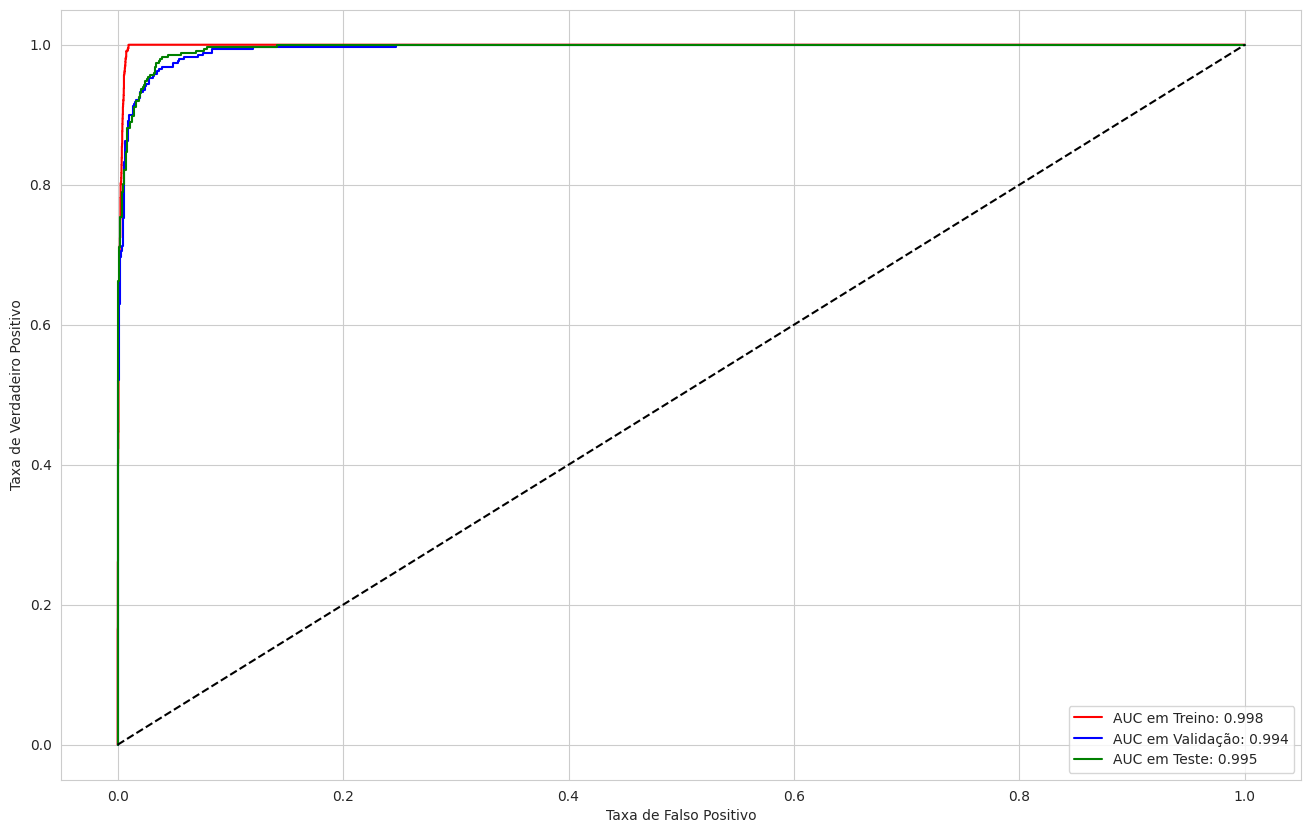

In [ ]:
# Calcula a curva ROC nos dados de treino
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# Calcula a curva ROC nos dados de validação
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

# Calcula a curva ROC nos dados de teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

# Plot
plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-', label = 'AUC em Treino: %.3f' % auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-', label = 'AUC em Validação: %.3f' % auc_valid)
plt.plot(fpr_test, tpr_test, 'g-', label = 'AUC em Teste: %.3f' % auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend()
plt.show()

### Etapa 14 - Deploy do Modelo e Uso com Novos Dados

In [ ]:
# Carregando novos dados
nova_maquina = pd.read_csv('novos_dados.csv')

In [ ]:
nova_maquina.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,51,43,34,21,13,12,6,4,1,-4,...,-41,-16,2,22,33,45,56,67,69,63


In [ ]:
# Aplicamos a padronização aos novos dados de entrada
nova_maquina_scaled = scaler.transform(nova_maquina)

In [ ]:
nova_maquina_scaled

array([[ 0.26690289,  0.22591066,  0.18765971,  0.13104167,  0.09073066,
         0.07747301,  0.04352615,  0.03546757,  0.02323495, -0.00124508,
        -0.04076084, -0.07015459, -0.08240328, -0.08122475, -0.06734654,
        -0.06606328, -0.07176014, -0.07677487, -0.05300624, -0.03983025,
        -0.05425001, -0.02883046, -0.0023399 ,  0.01041304,  0.00552855,
         0.00699201,  0.03442391,  0.06034625,  0.08867038,  0.08610908,
         0.07110177,  0.02294731,  0.00632972, -0.01496093,  0.00226304,
         0.024204  ,  0.06276872,  0.10669878,  0.12919652,  0.17023621,
         0.18832362,  0.21030896,  0.2025393 ,  0.22006737,  0.20947454,
         0.19714081,  0.18017113,  0.13577869,  0.07549131,  0.03060533,
         0.01756437, -0.03725465, -0.0910928 , -0.1317111 , -0.15347064,
        -0.17235232, -0.17822712, -0.18085287, -0.17436124, -0.14132302,
        -0.106206  , -0.06664049, -0.02986206, -0.04787253, -0.03856253,
        -0.030765  , -0.01515339,  0.02934456,  0.0

In [ ]:
# Previsão de classe
melhor_modelo.predict(nova_maquina_scaled)

array([0])

De acordo com os dados dos sensores IoT, essa máquina não precisa de manutenção.